In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt




In [3]:
#get data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train_virgin = x_train
x_test_virgin = x_test
y_train_virgin = y_train
y_test_virgin = y_test

In [4]:
#reshape
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
#float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

#one hot
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


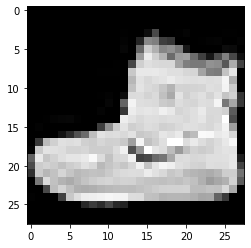

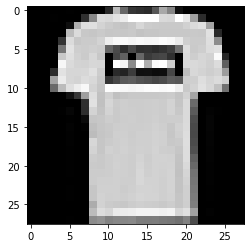

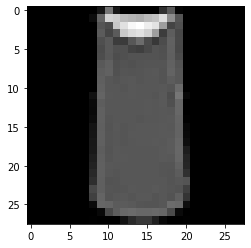

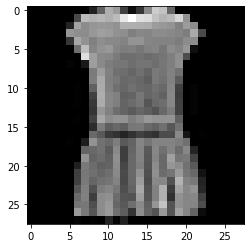

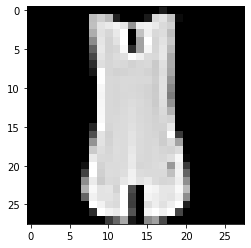

In [5]:
#plot a few examples
for i in range(5):
  img = x_train_virgin[i]  
  plt.imshow(img, cmap='gray')
  plt.show()

In [27]:
#with this dataset, fully connected models dont tend to do so well. So i will use the same convnet model i used to classify mnist to classify this fashion set
#second step: define and compile the model
model = tf.keras.Sequential([
    #first layer, convolution on the input layer. 32 3x3 filters on the input
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),#do max pooling with a pool/filter size of 2x2 
    tf.keras.layers.Flatten(),#flatten and pass into the fully connected part of the model
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer ='he_uniform'),
    tf.keras.layers.Dense(10, activation='softmax')
])
#compile optimize with stochastic gradient descent, with a learning rate of 0.01 and momentum of 0.9
optim = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer = optim, loss='categorical_crossentropy', metrics = ['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=10, validation_split=.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.4763 - accuracy: 0.8271 - val_loss: 0.3335 - val_accuracy: 0.8789
Epoch 2/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3051 - accuracy: 0.8900 - val_loss: 0.3629 - val_accuracy: 0.8682
Epoch 3/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2579 - accuracy: 0.9058 - val_loss: 0.2828 - val_accuracy: 0.8967
Epoch 4/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2268 - accuracy: 0.9164 - val_loss: 0.2921 - val_accuracy: 0.8932
Epoch 5/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.2046 - accuracy: 0.9250 - val_loss: 0.2644 - val_accuracy: 0.9072
Epoch 6/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1832 - accuracy: 0.9321 - val_loss: 0.2602 - val_accuracy: 0.9076
Epoch 7/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1653 - accuracy: 0.9399 - val_loss: 0.2703 -

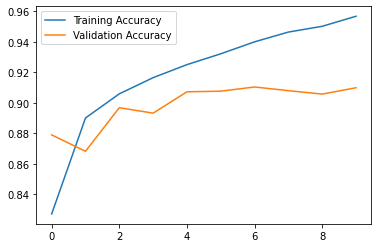

In [29]:
#plot metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()
#by looking at these plots I determined that 10-15 epochs is optimal

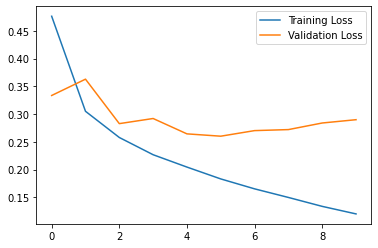

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [31]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 3s 9ms/step - loss: 0.3028 - accuracy: 0.9040
[0.3027855455875397, 0.9039999842643738]


tf.Tensor([10000    10], shape=(2,), dtype=int32)
tf.Tensor([10], shape=(1,), dtype=int32)


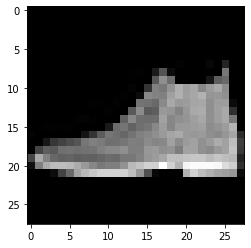

Predicted:>ankle boot
   Actual:>ankle boot


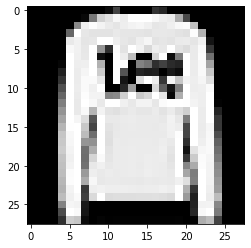

Predicted:>pullover
   Actual:>pullover


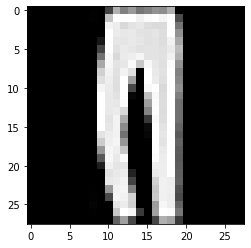

Predicted:>trouser
   Actual:>trouser


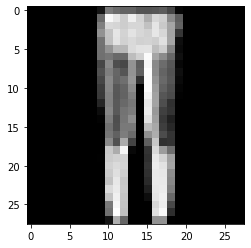

Predicted:>trouser
   Actual:>trouser


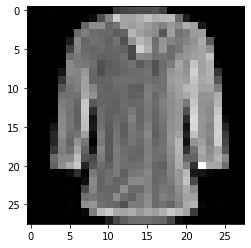

Predicted:>shirt
   Actual:>shirt


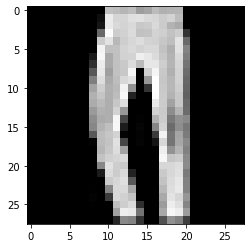

Predicted:>trouser
   Actual:>trouser


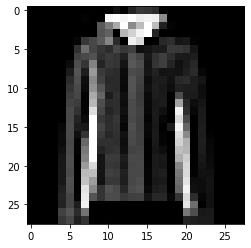

Predicted:>coat
   Actual:>coat


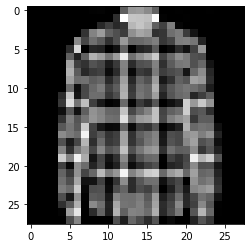

Predicted:>shirt
   Actual:>shirt


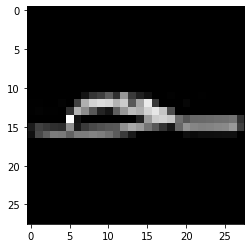

Predicted:>sandal
   Actual:>sandal


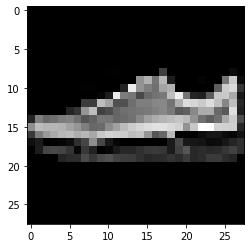

Predicted:>sneaker
   Actual:>sneaker


In [32]:
labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
predictions = model.predict(x_test)
print(tf.shape(predictions))
print(tf.shape(predictions[0]))
#convert predictions from list of 10 to max of that list of ten
max_index = 0
max = 0
pred_labels = []
for i in range(len(predictions)):
  max_index = 0
  max = 0 
  for j in range(len(predictions[i])):
    if predictions[i][j] > max:
      max = predictions[i][j]
      max_index = j
  pred_labels.append(labels[max_index])
predictions = pred_labels
#for i in range(10):
#  print("Prediction:>" + str(predictions[i]))
#  print("Actual:>" + str(y_test[i]))
#display the input image then the predicted label
for i in range(10): 
  plt.imshow(x_test_virgin[i], cmap='gray')
  plt.show()
  print("Predicted:>" + str(predictions[i]))
  print("   Actual:>" + str(labels[y_test_virgin[i]]))

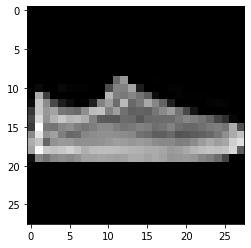

Predicted:>bag
   Actual:>sneaker


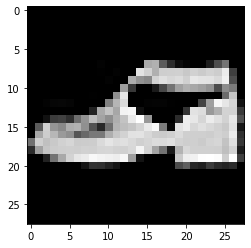

Predicted:>sandal
   Actual:>ankle boot


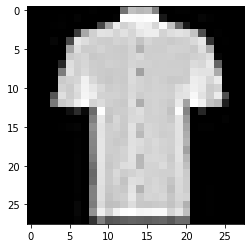

Predicted:>t-shirt
   Actual:>shirt


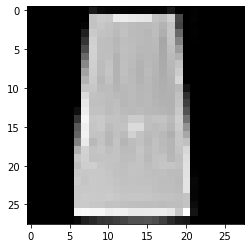

Predicted:>shirt
   Actual:>dress


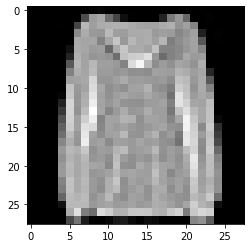

Predicted:>shirt
   Actual:>pullover


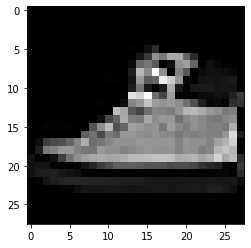

Predicted:>sneaker
   Actual:>ankle boot


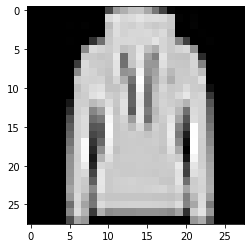

Predicted:>coat
   Actual:>pullover


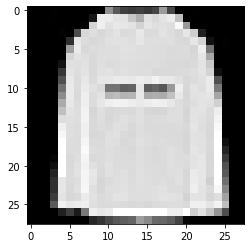

Predicted:>pullover
   Actual:>coat


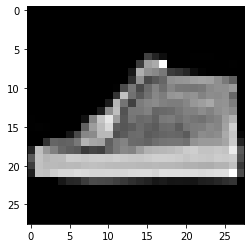

Predicted:>sneaker
   Actual:>ankle boot


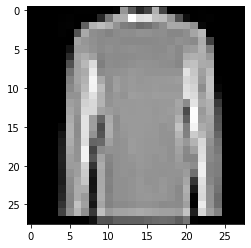

Predicted:>shirt
   Actual:>pullover


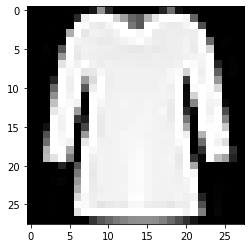

Predicted:>shirt
   Actual:>t-shirt


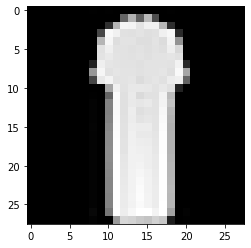

Predicted:>dress
   Actual:>shirt


In [33]:
#look at some wrong examples
wrong_indices = []
for i in range(len(predictions)):
  if predictions[i] != labels[y_test_virgin[i]]:
    wrong_indices.append(i)
n = 10
for j in range(len(wrong_indices)):
  plt.imshow(x_test_virgin[wrong_indices[j]], cmap='gray')
  plt.show()
  print("Predicted:>" + str(predictions[wrong_indices[j]]))
  print("   Actual:>" + str(labels[y_test_virgin[wrong_indices[j]]]))
  if j > n:
    break